In [561]:
import os 
import glob
import numpy as np
import cv2
from numpy import asarray,savez_compressed
from matplotlib import pyplot as plt
from PIL import Image


from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.utils import load_img


In [562]:
def load_images(imgpath,maskpath,labelpath,n_crops, size=(128,128)):
  src_list, mask_list, label_list = list(), list(), list()
  img_list = glob.glob("Dataset/*.jpg")
  for i in img_list:
    i = i.split("\\")
    i = i[1].split('.')
    split_name=i[0].split('_')
    for j in range(n_crops):
      img = load_img(os.path.join(imgpath,i[0]+"."+i[1]), target_size=size)
      fundus_img = img_to_array(img)
      src_list.append(fundus_img)
  return asarray(src_list)



In [563]:
imgpath = 'Dataset'
maskpath = 'Dataset_crop/Masks/'
labelpath = 'Dataset_crop/labels/'
src_images = load_images(imgpath,maskpath,labelpath,1, size=(128,128))
print('Loaded: ', src_images.shape)
# save as compressed numpy array
filename = 'a.npz'
savez_compressed(filename, src_images)
print('Saved dataset: ', filename)

Loaded:  (20, 128, 128, 3)
Saved dataset:  a.npz


In [564]:
def image_show(array):
  img=array_to_img(array)
  plt.imshow(img)
  plt.show()

(20, 128, 128, 3)
(128, 128, 3)
float32


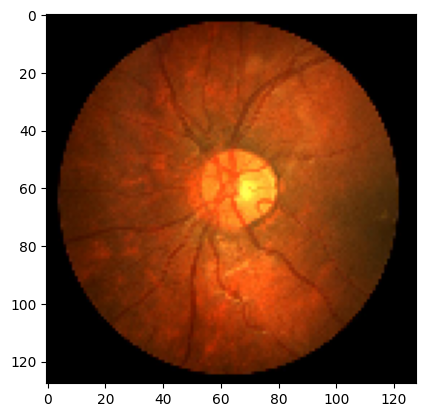

In [565]:
data = np.load('a.npz')
image_array=data['arr_0']
print(image_array.shape)
print(image_array[0].shape)
print(image_array[0].dtype)
image_show(image_array[0])


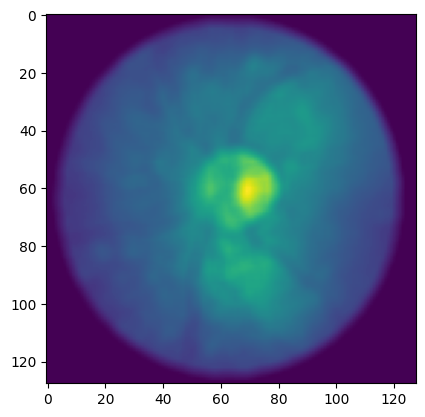

In [566]:
bgr_image = cv2.cvtColor(image_array[0], cv2.COLOR_RGB2BGR)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 5)
gray=np.expand_dims(gray, axis=2)
blurred=np.expand_dims(blurred, axis=2)
image_show(blurred)



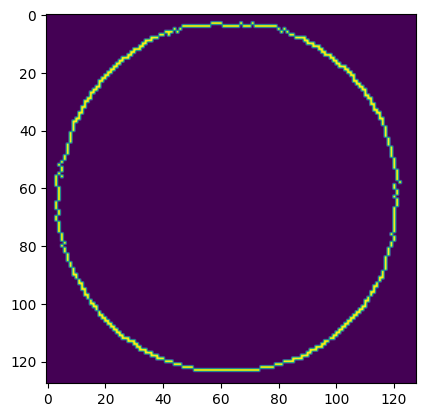

In [567]:

slice1Copy = np.uint8(blurred)
s_value = 0.7
md = np.median(blurred)
lower_value = int(max(0, (1.0-s_value) * md))
upper_value = int(min(255, (1.0+s_value) * md))

outer_line = cv2.Canny(slice1Copy, 60, 217)
outer_line=np.expand_dims(outer_line, axis=2)

# Display the processed image
image_show(outer_line)


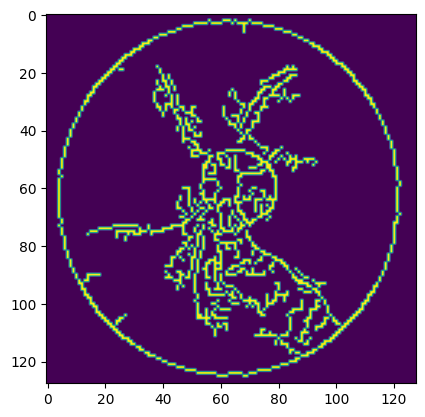

In [568]:

slice1Copy = np.uint8(gray)
s_value = 0.33
md = np.median(gray)
lower_value = int(max(0, (1.0-s_value) * md))
upper_value = int(min(255, (1.0+s_value) * md))

edges = cv2.Canny(slice1Copy, 40, 200)
edges=np.expand_dims(edges, axis=2)

# Display the processed image
image_show(edges)


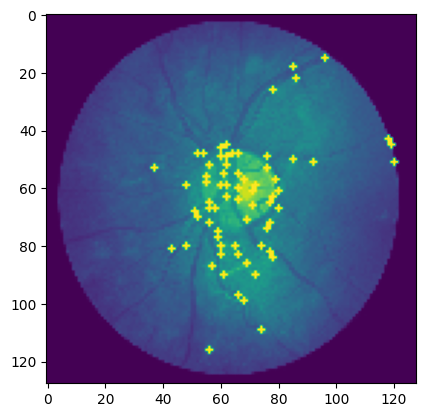

(<matplotlib.image.AxesImage at 0x2b2a2b242d0>, None)

In [569]:
#%%script false --no-raise-error

corners = cv2.goodFeaturesToTrack(gray,100000,0.1,0.01)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(gray,(x,y),1,255,-1)

plt.imshow(gray),plt.show()

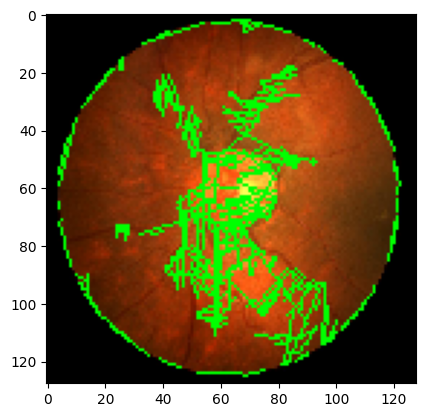

In [570]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,1,minLineLength=2,maxLineGap=5)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(rgb_image,(x1,y1),(x2,y2),(0,255,0,250),1)
image_show(rgb_image)